
# I- Affichage des données MNIST 


In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
np.random.seed(42)
m=10000
idx = np.random.permutation(60000)[:m]
X = mnist['data'][idx]
Y = mnist['target'][idx]

## 1- Utilisation de la méthode PCA

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
valeur_reduit = pca.fit_transform(X)

In [ ]:
print(valeur_reduit.shape)
print(valeur_reduit)
print(Y)

(10000, 2)
[[-105.30729185  493.63941628]
 [ 383.11652501 -833.89853427]
 [ -41.33460593 -267.78058557]
 ...
 [ 369.06641284  874.20676034]
 [ 338.27479538 -380.85764216]
 [-421.1131415  -443.81233664]]
[7 3 8 ... 9 8 1]


ValueError: ignored

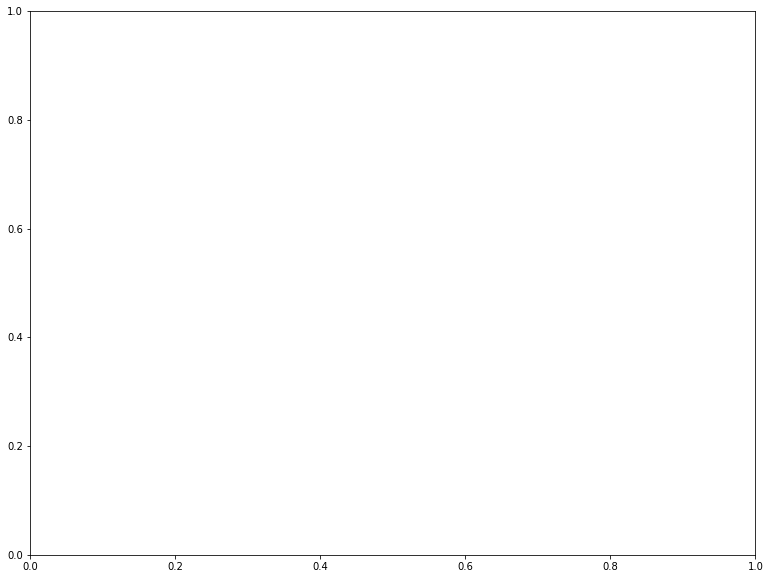

In [3]:
import matplotlib.pyplot as plt
from numpy import unique
plt.figure(figsize=(13,10))
plt.scatter(valeur_reduit,valeur_reduit,c=unique(Y))

## 2- Utilisation de la méthode t-SNE

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

In [ ]:
print(X_embedded.shape)

(10000, 2)


In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(X_embedded,X_embedded,c=unique(Y))

NameError: ignored

<Figure size 936x720 with 0 Axes>

# II- PCA sur les données MNIST  

## 1- Résultats de RandomForest SANS la réduction de la dimensionnalité des données

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
X = mnist['data']
Y = mnist['target']
X_train,X_test,Y_train,Y_test= X[:60000],X[60000:],Y[:60000],Y[60000:]
print(X_train.shape)

(60000, 784)


In [ ]:
from time import time
t1 = time()
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, Y_train)
t2= time()
t_tot = t2-t1
t_tot = format(t_tot, '.2f') 
print("Il faut ",t_tot,"secondes pour l'apprentissage")

1610744014.2598114
1610744069.2716253
Il faut  55.01 secondes pour l'apprentissage


In [ ]:
forest_predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, forest_predict)
print("Le score de prédiction est de ", acc_score )

Le score de prédiction est de  0.9687


Le modèle d'apprentissage posséde un trés bon score.
On peut donc le considérer comme fiable.

## 2- Résultats de RandomForest AVEC la réduction de la dimensionnalité des données

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
valeur_reduit = pca.fit_transform(X_train)
print(X_train.shape,valeur_reduit.shape)

(60000, 784) (60000, 154)


In [ ]:
t1 = time()
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(valeur_reduit, Y_train)
t2= time()
t_tot = t2-t1
t_tot = format(t_tot, '.2f') 
print("Il faut ",t_tot,"secondes pour l'apprentissage")

Il faut  125.77 secondes pour l'apprentissage


Le temps est 2 fois plus long, donc non. Je m'attendais a une réduction du temps, vu qu'il y a moins de donnée.

In [ ]:
valeur_reduit_test = pca.transform(X_test)

In [ ]:
forest_predict = clf.predict(valeur_reduit_test)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, forest_predict)
print("Le score de prédiction est de ", acc_score )

Le score de prédiction est de  0.9471


Le score est plus faible, mais d'en une proportion qui n'est pas dérangeante.
Mais vue que la méthode PCA augmente le temps d'apprentissage, la méthode n'est pas utile. Elle est même contre-productif

## 3- Résultats de Softmax SANS la réduction de la dimensionnalité des données

In [ ]:
from sklearn.linear_model import LogisticRegression
t1 = time()
clf = LogisticRegression(random_state=0).fit(X_train,Y_train)
t2 = time()
t_tot = t2-t1
t_tot = format(t_tot, '.2f') 
print("Il faut ",t_tot,"secondes pour l'apprentissage")

Il faut  47.23 secondes pour l'apprentissage


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logistic_predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, logistic_predict)
print("Le score de prédiction est de ", acc_score )

Le score de prédiction est de  0.9255


Le modèle d'apprentissage par LogisticRegression posséde un trés bon score. Mais il est plus faible que le ramdom Forest.


## 4- Résultats de Softmax AVEC la réduction de la dimensionnalité des données

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
valeur_reduit = pca.fit_transform(X_train)
print(X_train.shape,valeur_reduit.shape)

(60000, 784) (60000, 154)


In [ ]:
t1 = time()
clf = LogisticRegression(random_state=0).fit(valeur_reduit,Y_train)
t2= time()
t_tot = t2-t1
t_tot = format(t_tot, '.2f') 
print("Il faut ",t_tot,"secondes pour l'apprentissage")

Il faut  13.74 secondes pour l'apprentissage


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Le temps a était divisé par 4 avec la méthode PCA.

In [ ]:
valeur_reduit_test = pca.transform(X_test)

In [ ]:
forest_predict = clf.predict(valeur_reduit_test)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, forest_predict)
print("Le score de prédiction est de ", acc_score )

Le score de prédiction est de  0.9471


Avec la méthode PCA en plus de réduire le temps d'apprentissage, le score de prédiction augmente.
Donc pour conclure la méthode PCA n'est pas forcément positif, mais elle peut valoir le coup de l'essayer.